## Hyperplane

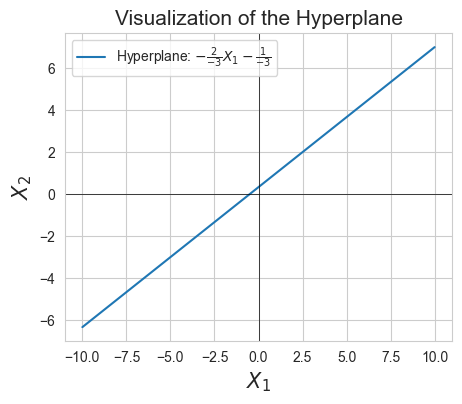

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Given beta values
beta_0 = 1
beta_1 = 2
beta_2 = -3

fontsize = 15

# Generating X1 values
X1 = np.linspace(-10, 10, 400)

# Calculating X2 values for the line
X2 = (-beta_1 / beta_2) * X1 - (beta_0 / beta_2)

# Setting the style for seaborn
sns.set_style("whitegrid")

# Now using seaborn for plotting
plt.figure(figsize=(5, 4))
sns.lineplot(x=X1, y=X2, label='Hyperplane: $-\\frac{2}{-3}X_1 - \\frac{1}{-3}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Visualization of the Hyperplane', fontsize=fontsize)
plt.xlabel('$X_1$', fontsize=fontsize)
plt.ylabel('$X_2$', fontsize=fontsize)
plt.legend()
plt.grid(True)
plt.savefig('pictures/hyperplane_2d.pdf')
plt.show()



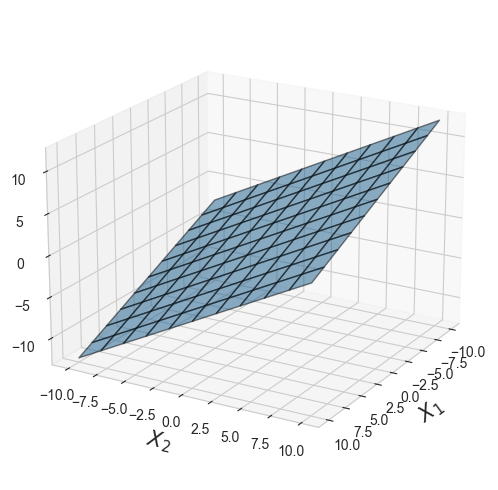

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Given beta values for 3D
beta_0, beta_1, beta_2, beta_3 = 1, 2, -3, 4

# Creating a meshgrid for X1 and X2
X1, X2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# Calculating X3 values for the plane
X3 = (-beta_1 / beta_3) * X1 - (beta_2 / beta_3) * X2 - (beta_0 / beta_3)

# Adjusting the view angle of the 3D plot
elev = 20  # elevation angle
azim = 30  # azimuth angle

# Replotting with the new view angle
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, X3, alpha=0.5, rstride=10, cstride=10, edgecolor='k')  
ax.view_init(elev=elev, azim=azim)  # Setting the view angle
ax.set_xlabel('$X_1$', fontsize=fontsize)
ax.set_ylabel('$X_2$', fontsize=fontsize)
ax.set_zlabel('$X_3$', fontsize=fontsize)
# ax.set_title('3D Visualization of the Hyperplane', fontsize=14)
plt.tight_layout()
plt.savefig('pictures/hyperplane_3d.pdf')
plt.show()



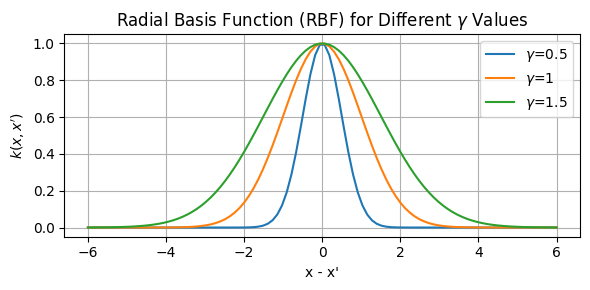

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Radial Basis Function (RBF)
def rbf(x, c, sigma):
    return np.exp(-((x - c)**2) / (2 * sigma**2))

# Define a range of x values
x = np.linspace(-6, 6, 100)

# Choose parameters for the RBF
c = 0  # Center of the RBF
sigma_values = [0.5, 1, 1.5]  # Different values for sigma

# Plot the RBF for different sigma values
plt.figure(figsize=(6, 3))
for sigma in sigma_values:
    plt.plot(x, rbf(x, c, sigma), label=f'$\gamma$={sigma}')

plt.title('Radial Basis Function (RBF) for Different $\gamma$ Values')
plt.xlabel('x - x\'')
plt.ylabel('$k(x,x\')$')
# plt.xlim(-6, 6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('pictures/rbf.pdf')
plt.show()


In [81]:
import numpy as np
from copy import copy 

class SimpleSVM:
    def __init__(self, kernel='linear', C=1.0, degree=3, gamma=None, 
                 learning_rate=0.01, n_iters=1000):
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.alpha = None
        self.b = 0
        self.X_train = None
        self.y_train = None

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return 
        elif self.kernel == 'poly':
            return 
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / x1.shape[0]  # Default gamma value
            return 
        else:
            raise ValueError("Unknown kernel")

    def fit(self, X, y):
        self.X_train = copy(X)
        self.y_train = copy(y)
        n_samples, _ = X.shape
        self.alpha = np.zeros(n_samples)

        for _ in range(self.n_iters):
            for i in range(n_samples):
                gradient = ?
                self.alpha[i] += ?
                self.alpha[i] = min(max(self.alpha[i], 0), self.C)

        self.b = 1 / X.shape[0] * sum(y[i] - sum(
            ?
            for j in range(n_samples)) 
            for i in range(n_samples))

    def predict(self, X):
        predictions = np.sign([
            ? + self.b for x in X
        ])
        return predictions

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values="?")
data = data.dropna()

# Prepare the features and labels
X = data.drop('target', axis=1).values
y = data['target'].values

# Convert labels to binary (-1, 1)
y = np.where(y > 0, 1, -1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM
svm = SimpleSVM(kernel='rbf', learning_rate=0.01, n_iters=30)
svm.fit(X_train, y_train)

# Make predictions and calculate accuracy
predictions = svm.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9


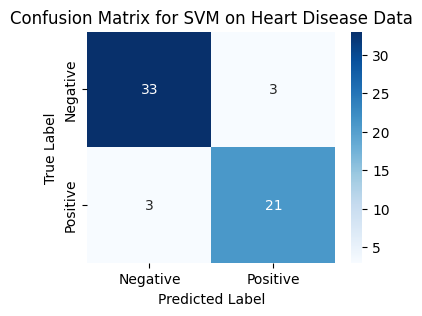

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM on Heart Disease Data')
plt.show()

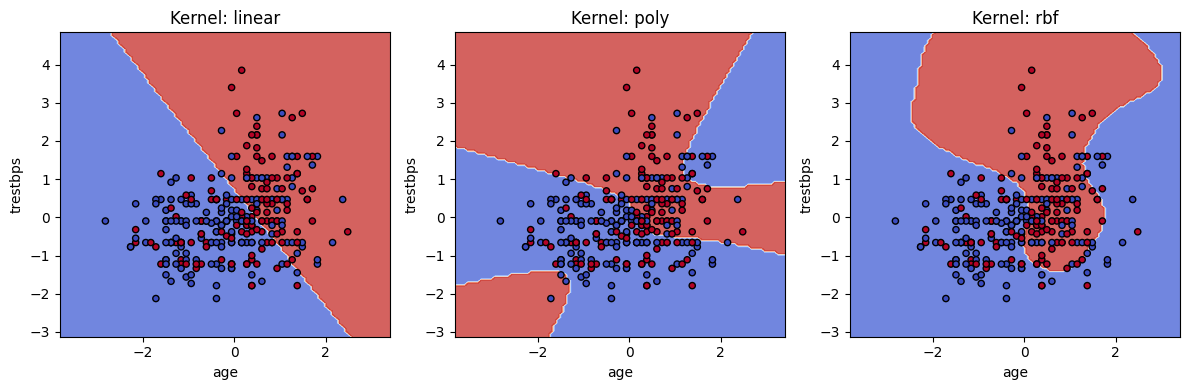

In [84]:
def plot_decision_boundary_2D(clf, X, y, feature_names, title="Decision Boundary"):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict and plot
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

# Select two features for visualization (e.g., 'age' and 'trestbps')
feature_indices = [0, 3]  # Indices of 'age' and 'trestbps'
feature_names = [column_names[index] for index in feature_indices]  # Feature names for labeling
X_vis = X[:, feature_indices]

# Plotting decision boundaries with different kernels
kernels = ['linear', 'poly', 'rbf']
plt.figure(figsize=(12, 4))
for i, kernel in enumerate(kernels):
    svm = SimpleSVM(kernel=kernel, C=1.0, learning_rate=0.01, n_iters=30)
    svm.fit(X_vis, y)
    plt.subplot(1, 3, i + 1)
    plot_decision_boundary_2D(svm, X_vis, y, feature_names, title=f"Kernel: {kernel}")

plt.tight_layout()
plt.savefig('pictures/svm_heart_disease.pdf')
plt.show()

In [85]:
from sklearn.datasets import make_circles

In [86]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title(title)

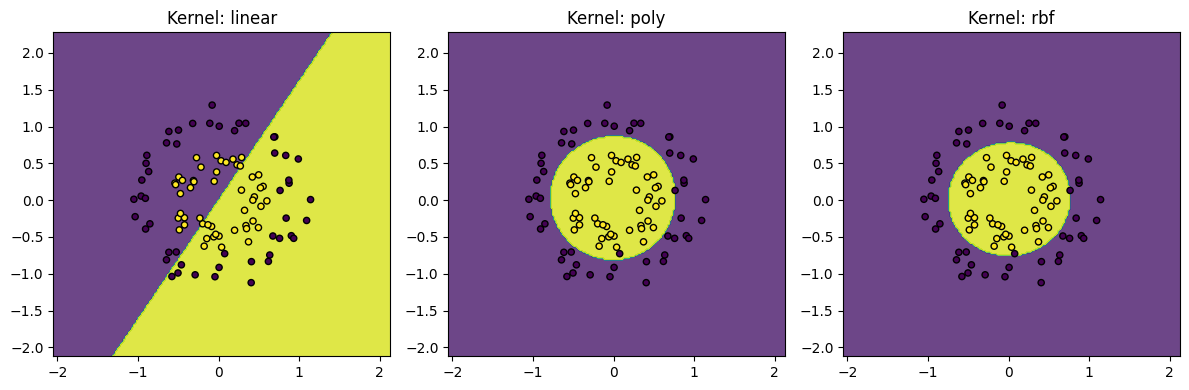

In [87]:
# Generate a toy dataset (circles)
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)
y = np.where(y == 0, -1, 1)

# Plotting decision boundaries with different kernels
kernels = ['linear', 'poly', 'rbf']
plt.figure(figsize=(12, 4))
for i, kernel in enumerate(kernels):
    svm = SimpleSVM(kernel=kernel, C=1.0, learning_rate=0.01, n_iters=30)
    svm.fit(X, y)
    plt.subplot(1, 3, i + 1)
    plot_decision_boundary(svm, X, y, title=f"Kernel: {kernel}")

plt.tight_layout()
plt.savefig('pictures/svm_blob.pdf')
plt.show()